# Online Payment Fraud Detection System

To identify online payment fraud with machine learning, we need to train a machine learning model for classifying fraudulent and non-fraudulent payments. For this, we need a dataset containing information about online payment fraud, so that we can understand what type of transactions lead to fraud. For this task, I collected a dataset from Kaggle, which contains historical information about fraudulent transactions which can be used to detect fraud in online payments.

# import the liabraries

In [292]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Analyzing data

Dataset are stored in df variable.

In [293]:
df=pd.read_csv("FRAUD_1.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


# Description of the dataset

1) step: represents a unit of time where 1 step equals 1 hour
2) type: type of online transaction
3) amount: the amount of the transaction
4) nameOrig: customer starting the transaction
5) oldbalanceOrg: balance before the transaction
6) newbalanceOrig: balance after the transaction
7) nameDest: recipient of the transaction
8) oldbalanceDest: initial balance of recipient before the transaction
9) newbalanceDest: the new balance of recipient after the transaction
10) isFraud: fraud transaction

In [294]:
df.columns
#we get the column name

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            1209 non-null   int64  
 1   type            1209 non-null   object 
 2   amount          1209 non-null   float64
 3   nameOrig        1209 non-null   object 
 4   oldbalanceOrg   1209 non-null   float64
 5   newbalanceOrig  1209 non-null   float64
 6   nameDest        1209 non-null   object 
 7   oldbalanceDest  1209 non-null   float64
 8   newbalanceDest  1209 non-null   float64
 9   isFraud         1209 non-null   int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 94.6+ KB


In [296]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1209.0,1.209000e+03,1.209000e+03,1.209000e+03,1.209000e+03,1.209000e+03,1209.000000
mean,1.0,1.181077e+05,7.367593e+05,7.523586e+05,6.348307e+05,1.135451e+06,0.012407
std,0.0,2.705046e+05,1.915334e+06,1.961387e+06,2.016544e+06,3.278765e+06,0.110739
min,1.0,8.730000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.0,4.145040e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,1.0,1.177054e+04,1.538300e+04,6.267770e+03,1.371100e+04,0.000000e+00,0.000000
75%,1.0,1.344261e+05,9.506600e+04,8.486436e+04,3.992147e+05,4.242505e+05,0.000000
max,1.0,3.776389e+06,9.716462e+06,9.987287e+06,1.910000e+07,1.920000e+07,1.000000


In [297]:
df.isnull().sum()
#check the nan value in columns

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [298]:
df.shape
#get the shape of the dataset

(1209, 10)

In [299]:
df['step'].unique()
#get 1 value store in step

array([1], dtype=int64)

In [300]:
df['type'].unique()
#get 5 object store in type column

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [301]:
df['type'].value_counts()
#list of different types

type
PAYMENT     561
CASH_OUT    250
CASH_IN     185
TRANSFER    142
DEBIT        71
Name: count, dtype: int64

# Graphical Representation

We can used the count plot to represent the count of the obervation present in the categorical variables.

<Axes: xlabel='type', ylabel='count'>

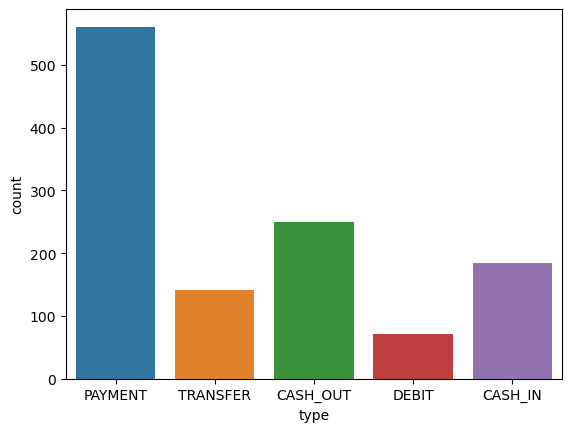

In [302]:
#plot the countplot
sns.countplot(x='type', data=df)


Plot the correlation heatmap

    Correlation heatmap is a graphical tool that display the correlation between multiple variables as a color code

<Axes: >

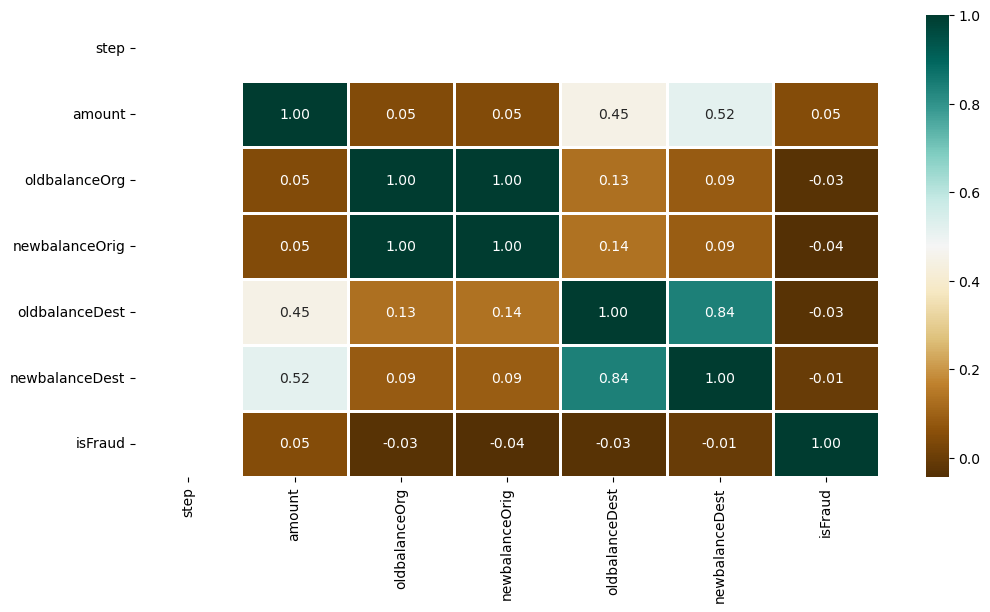

In [303]:
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), cmap='BrBG', fmt='.2f', linewidths=2, annot=True)

#draw a pie chart

#for analyzing how many % data store in each type

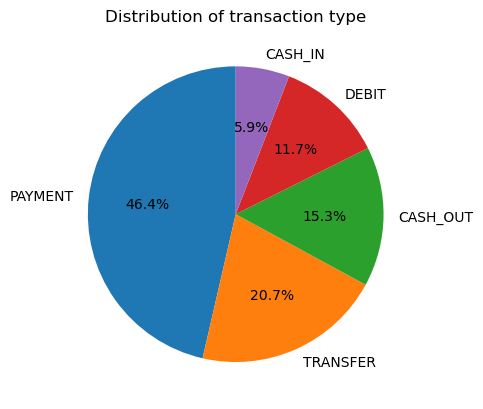

In [304]:
quan=np.array([561,250,185,142,71])
mylable=['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN']
plt.pie(quan,labels=mylable,startangle=90,autopct='%1.1f%%')
plt.title("Distribution of transaction type")
plt.show()

In [305]:
#print our priginal dataset
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


# One-Hot Encoding

In [306]:
from sklearn.preprocessing import OneHotEncoder

In [307]:
df1=df[['type']]
df1.head()
#use df1 to store type column, which is convert using one-hot encoding

,type
0,PAYMENT
1,PAYMENT
2,TRANSFER
3,CASH_OUT
4,PAYMENT


In [308]:
oh_enc = OneHotEncoder(sparse=False,)
#it provide output in Numpy array
oh_enc_arr = oh_enc.fit_transform(df1)

oh_enc_arr

D:\Users\A\anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [309]:
dummy_df=pd.get_dummies(df1)
dummy_df.head(4)

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,False,True
3,False,True,False,False,False


In [310]:
dummy_df.keys()

Index(['type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT',
       'type_TRANSFER'],
      dtype='object')

In [311]:
oh_enc = OneHotEncoder(sparse=False,drop='first')
oh_enc_arr = oh_enc.fit_transform(df1)
oh_enc_arr

D:\Users\A\anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [312]:
oh_enc_df = pd.DataFrame(oh_enc_arr, columns=['type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT',
       'type_TRANSFER'] ,)

oh_enc_df


,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
1204,0.0,0.0,0.0,1.0
1205,0.0,0.0,0.0,1.0
1206,0.0,0.0,0.0,1.0
1207,0.0,0.0,0.0,1.0


In [313]:
df1['type_CASH_OUT'] = oh_enc_df[['type_TRANSFER']].copy()

C:\Users\A\AppData\Local\Temp\ipykernel_8600\4175194588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['type_CASH_OUT'] = oh_enc_df[['type_TRANSFER']].copy()


In [314]:
df1['type_CASH_OUT'] = oh_enc_df[['type_PAYMENT']].copy()

C:\Users\A\AppData\Local\Temp\ipykernel_8600\3013822764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['type_CASH_OUT'] = oh_enc_df[['type_PAYMENT']].copy()


In [315]:
df1['type_CASH_OUT'] = oh_enc_df[['type_DEBIT']].copy()

C:\Users\A\AppData\Local\Temp\ipykernel_8600\153836189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['type_CASH_OUT'] = oh_enc_df[['type_DEBIT']].copy()


In [316]:
df1['type'] = df1[['type_CASH_OUT']].copy()

C:\Users\A\AppData\Local\Temp\ipykernel_8600\4240181564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['type'] = df1[['type_CASH_OUT']].copy()


In [317]:
print("Print the dataset after converting type column")
df.update(df1)
df.head()

Print the dataset after converting type column


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,0.0,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,0.0,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,0.0,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,0.0,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,0.0,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


# Split the Data

In [318]:
x=np.array(df[['type','amount','oldbalanceOrg','newbalanceOrig']])
y=np.array(df.iloc[:,-1])

In [319]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=51)

print('Shape of x_train = ', x_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of x_test = ', x_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of x_train =  (967, 4)
Shape of y_train =  (967,)
Shape of x_test =  (242, 4)
Shape of y_test =  (242,)


# Feature Scaling

In [320]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [321]:
sc.fit(x_train)

StandardScaler()

# Apply Machine Learning Algorithm

# Random Forest Classifier

In [322]:
# load random forest classifier 
from sklearn.ensemble import RandomForestClassifier

In [323]:
Classifier = RandomForestClassifier(criterion='gini')
Classifier.fit(x_train,y_train)

RandomForestClassifier()

In [324]:
x_test

array([[0.0, 6911.99, 6307878.9, 6300966.92],
       [0.0, 2771.16, 60721.0, 57949.84],
       [0.0, 3823.08, 10382.0, 6558.92],
       [0.0, 17373.04, 19873.62, 2500.58],
       [0.0, 9758.09, 21217.0, 11458.91],
       [0.0, 1175.59, 20509.0, 19333.41],
       [0.0, 1873.13, 139873.0, 137999.87],
       [0.0, 593.4, 0.0, 0.0],
       [0.0, 416001.33, 0.0, 0.0],
       [0.0, 58.21, 14506.0, 14447.79],
       [0.0, 230021.01, 1861208.43, 2091229.45],
       [0.0, 101940.14, 0.0, 0.0],
       [0.0, 17231.46, 0.0, 0.0],
       [0.0, 2998.2, 15593.45, 12595.25],
       [0.0, 2278.19, 290.0, 0.0],
       [0.0, 7659.86, 544.0, 0.0],
       [0.0, 5937.72, 21779.0, 15841.28],
       [0.0, 3896.42, 11558.39, 7661.97],
       [0.0, 116977.58, 0.0, 0.0],
       [0.0, 9805.46, 0.0, 0.0],
       [0.0, 128278.74, 0.0, 0.0],
       [0.0, 132953.45, 7964926.82, 8097880.27],
       [0.0, 1180.55, 1345065.25, 1343884.7],
       [0.0, 26923.42, 11049.67, 0.0],
       [0.0, 4306.89, 256849.49, 252542.6],

In [325]:
y_pred=Classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

In [326]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

In [327]:
x_train_sc=sc.transform(x_train)
x_test_sc=sc.transform(x_test)

In [328]:
Classifier.score(x_test,y_test)

0.9917355371900827

In [329]:
# prediction
#features = [type, amount, oldbalanceOrg, newbalanceOrig]

features = np.array([[1, 181.00, 181.0, 0.0]])
print(Classifier.predict(features))

[1]


# Now use the Confusion Matrix

In [330]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [331]:
cm = confusion_matrix(y_test,y_pred)

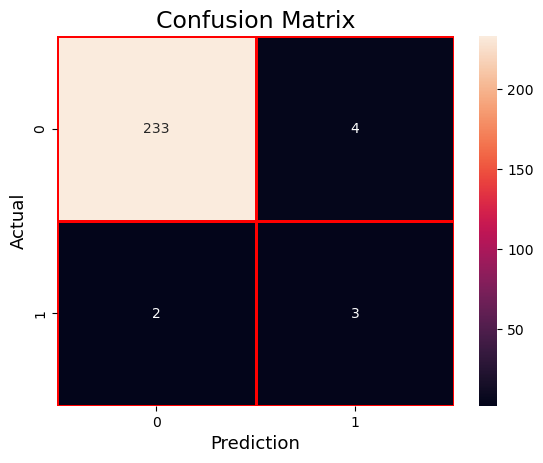

In [367]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            linewidths=1,
            linecolor='red',
            )
            
plt.ylabel('Actual',fontsize=13)

plt.xlabel('Prediction',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

The confusion matrix has 4 different quadrants:
    
    1) True Positive(Top Left Quadrant)
    2) False Positive(Top Right Quadrant)
    3) False Negative(Bottom Left Quadrant)
    4) True Negative(Bottom Right Quadrant)

True means that the values were accurately predicted, False means that there was an error or wrong prediction.

# Accuracy, Precision, Recall, f1-score calculate below:

# Accuracy:-

    accuracy measure how often the model is correct.
    
    Formula:-  
        Accuracy = (True Positive + True Negative)/Total Prediction

# Precision:-

precision is a measure of how accurate a model’s positive predictions are.

Formula:-

        True Positive / (True Positive + False Positive)

# Recall:-

Recall measures the effectiveness of a classification model in identifying all relevant instances from a dataset.
    (which are positives that have been incorrectly predicted as negative)

Formula:-
        
        Recall = True Positive / (True Positive + False Negative)

# F1-Score:-

F1 score is a harmonic mean of precision and sensitivity.

Formula:-
        
        2 * ((Precision * Sensitivity) / (Precision + Sensitivity))

In [333]:

accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.9917355371900827


In [334]:
precision = precision_score(y_test,y_pred, average='macro')
print(precision)

0.99581589958159


In [335]:
recall = recall_score(y_test,y_pred, average='macro')
print(recall)

0.8


In [336]:
F1_score = f1_score(y_test,y_pred, average='macro')
print(F1_score)

0.8728991596638654


# Now used the Decision Tree Classification

In [337]:
from sklearn.tree import DecisionTreeClassifier

In [338]:
Classifier = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0)
Classifier.fit(x_train,y_train)
Classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [339]:
x_test

array([[0.0, 6911.99, 6307878.9, 6300966.92],
       [0.0, 2771.16, 60721.0, 57949.84],
       [0.0, 3823.08, 10382.0, 6558.92],
       [0.0, 17373.04, 19873.62, 2500.58],
       [0.0, 9758.09, 21217.0, 11458.91],
       [0.0, 1175.59, 20509.0, 19333.41],
       [0.0, 1873.13, 139873.0, 137999.87],
       [0.0, 593.4, 0.0, 0.0],
       [0.0, 416001.33, 0.0, 0.0],
       [0.0, 58.21, 14506.0, 14447.79],
       [0.0, 230021.01, 1861208.43, 2091229.45],
       [0.0, 101940.14, 0.0, 0.0],
       [0.0, 17231.46, 0.0, 0.0],
       [0.0, 2998.2, 15593.45, 12595.25],
       [0.0, 2278.19, 290.0, 0.0],
       [0.0, 7659.86, 544.0, 0.0],
       [0.0, 5937.72, 21779.0, 15841.28],
       [0.0, 3896.42, 11558.39, 7661.97],
       [0.0, 116977.58, 0.0, 0.0],
       [0.0, 9805.46, 0.0, 0.0],
       [0.0, 128278.74, 0.0, 0.0],
       [0.0, 132953.45, 7964926.82, 8097880.27],
       [0.0, 1180.55, 1345065.25, 1343884.7],
       [0.0, 26923.42, 11049.67, 0.0],
       [0.0, 4306.89, 256849.49, 252542.6],

In [340]:
Classifier.score(x_test,y_test)

0.9752066115702479

In [341]:
y_pred=Classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

# Now use the Support Vector Classification

In [348]:
from sklearn.svm import SVC

In [349]:
classification_rbf =SVC(kernel='rbf')
classification_rbf.fit(x_train, y_train)

SVC()

In [350]:
classification_rbf.score(x_test,y_test)

0.9793388429752066

In [351]:
x_train_sc=sc.transform(x_train)
x_test_sc=sc.transform(x_test)

In [352]:
classification_rbf_2=SVC(kernel='rbf')
classification_rbf_2.fit(x_train_sc,y_train)
classification_rbf_2.score(x_test_sc,y_test)

0.9793388429752066

# Tune Parameter

# Regularization (C)

In [353]:
model_c=SVC(C=5)
model_c.fit(x_train,y_train)
model_c.score(x_test,y_test)

0.9793388429752066

In [354]:
model_c=SVC(C=10)
model_c.fit(x_train,y_train)
model_c.score(x_test,y_test)

0.9834710743801653

# Gamma

In [355]:
model_g=SVC(gamma=5)
model_g.fit(x_train,y_train)
model_g.score(x_test,y_test)

0.9917355371900827

# SVC with kernal polynomial

In [356]:
classification_poly=SVC(kernel='poly',degree=2)
classification_poly.fit(x_train_sc,y_train)
classification_poly.score(x_test_sc,y_test)

0.9793388429752066

# SVC with kernal linear

In [357]:
classification_linear=SVC(kernel='linear')
classification_linear.fit(x_train_sc,y_train)
classification_linear.score(x_test_sc,y_test)

0.9793388429752066

# K-Fold

In [358]:
from sklearn.neighbors import KNeighborsClassifier

In [359]:
Classifier = KNeighborsClassifier(n_neighbors=5)
Classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [360]:
y_pred=Classifier.score(x_test,y_test)
y_pred

0.9793388429752066

In [361]:
from sklearn.model_selection import cross_val_score

In [362]:
score_knn=cross_val_score(KNeighborsClassifier(n_neighbors=20), x_train,y_train,cv=2)
print(score_knn)
print("Avg :",np.average(score_knn))

[0.98966942 0.98964803]
Avg : 0.9896587273069486


In [363]:
score_rf=cross_val_score(RandomForestClassifier(n_estimators=40),x_train,y_train,cv=3)
print(score_rf)
print("Avg:",np.average(score_rf))

[0.99071207 0.99378882 0.99689441]
Avg: 0.9937984347056901
